In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn import metrics


Load Dataset

In [3]:
df_train = pd.read_csv('Housing.train.csv')


In [4]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [5]:
df_train.drop(['Alley'],axis=1,inplace=True)
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

In [6]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])

In [7]:
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [9]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df_test = pd.read_csv('Housing.test.csv')


In [12]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [13]:
df_test.drop(['Alley'],axis=1,inplace=True)
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [14]:
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

In [15]:
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 75, dtype: int64

In [17]:
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [18]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


Large Houses Will Cost More

In [19]:
df_train['YearBuilt'] = df_train['YearBuilt'].fillna(df_train['YearBuilt']).median()

<AxesSubplot:xlabel='BldgType', ylabel='count'>

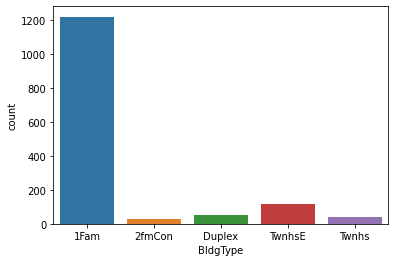

In [20]:
sns.countplot(x ='BldgType',data=df_train)

<AxesSubplot:xlabel='YearBuilt'>

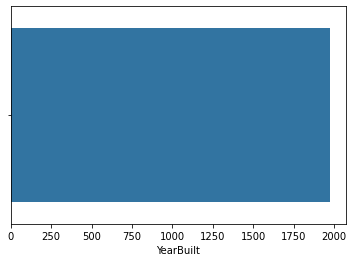

In [21]:
sns.barplot(x = df_train['YearBuilt'],data=df_train)



Split The Data To Predict Who will survive

In [22]:
def predict(df_train):
     
    if (df_train['BldgType'] == '1Fam' and df_train['YearBuilt']==1920,2007): 
          return df_train.loc[:,df_train.columns != 'SalePrice'] 
    elif (df_train['BldgType'] =='2FamCon' and df_train['YearBuilt']==1920,2007):
         return df_train.loc[:,df_train.columns != 'SalePrice']
    elif (df_train['BldgType'] =='Duplex' and df_train['YearBuilt']==1920,2007):
         return df_train.loc[:,df_train.columns != 'SalePrice']
    elif (df_train['BldgType'] == 'TwnhsE' and df_train['YearBuilt'] == 1920,2007):
         return df_train.loc[:,df_train.columns != 'SalePrice']
    elif (df_train['BldgType'] == 'Twnhs' and df_train['YearBuilt'] == 1920,2007):
         return df_train.loc[:,df_train.columns != 'SalePrice'],
        

 

In [23]:
def predict(df_test):
     
    if (df_test['BldgType'] == '1Fam' and df_test['YearBuilt']==1920,2007): 
          return df_test.loc[:,df_test.columns != 'SalePrice'] 
    elif (df_test['BldgType'] =='2FamCon' and df_test['YearBuilt']==1920,2007):
         return df_test.loc[:,df_test.columns != 'SalePrice']
    elif (df_test['BldgType'] =='Duplex' and df_test['YearBuilt']==1920,2007):
         return df_test.loc[:,df_test.columns != 'SalePrice']
    elif (df_test['BldgType'] == 'TwnhsE' and df_test['YearBuilt'] == 1920,2007):
         return df_test.loc[:,df_test.columns != 'SalePrice']
    elif (df_test['BldgType'] == 'Twnhs' and df_test['YearBuilt'] == 1920,2007):
         return df_test.loc[:,df_train.columns != 'SalePrice'],
        

print(df_test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ... 

In [24]:
X_train = df_train.loc[:,df_train.columns != 'SalePrice']
y_train = df_train.SalePrice
print(y_train.head())
lebel_en = LabelEncoder()
y_train = lebel_en.fit_transform(y_train)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [25]:
X_test = df_train.loc[:,df_train.columns != 'SalePrice']
y_test = df_train.SalePrice
print(y_test.head())
lebel_en = LabelEncoder()
y_train = lebel_en.fit_transform(y_test)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [26]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

Accuracy 0.9808219178082191


<AxesSubplot:ylabel='Count'>

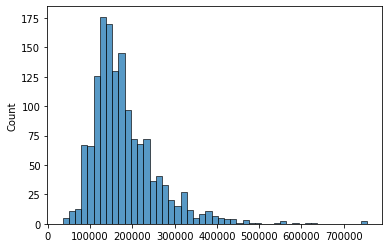

In [27]:

clf = RandomForestClassifier(n_estimators=100,max_depth=13)
clf.fit(X_test_encoded,y_test)
y_pred = clf.predict(X_test_encoded)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
sns.histplot(y_pred)


<AxesSubplot:xlabel='BldgType', ylabel='Count'>

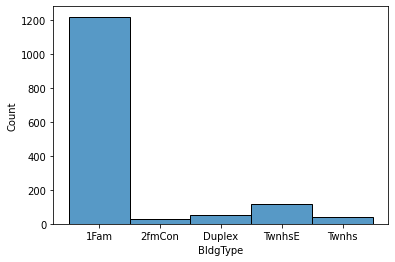

In [28]:
sns.histplot(X_test['BldgType'])

In [29]:
submission = df_test[['Id']]
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [30]:
submission['SalePrice'] = y_test

C:\Users\1040G3~1\AppData\Local\Temp/ipykernel_6304/1212241016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SalePrice'] = y_test


In [31]:
submission

,Id,SalePrice
0,1461,208500
1,1462,181500
2,1463,223500
3,1464,140000
4,1465,250000
...,...,...
1454,2915,185000
1455,2916,175000
1456,2917,210000
1457,2918,266500


In [32]:
submission.to_csv('submission.csv',index=None)

In [33]:
pd.read_csv('Submission.csv')

,Id,SalePrice
0,1461,208500
1,1462,181500
2,1463,223500
3,1464,140000
4,1465,250000
...,...,...
1454,2915,185000
1455,2916,175000
1456,2917,210000
1457,2918,266500
